### Ollama 실행체크

In [3]:
import requests

response = requests.get("http://127.0.0.1:11434")
print(response.text)

Ollama is running


### deepseek-r1 과 qwen2.5  모델 사용하기

In [7]:
from langchain_ollama import ChatOllama
#from langchain_core.prompts import PromptTemplate
from langchain_core.prompts import ChatPromptTemplate
from pprint import pprint

# Ollama를 사용하여 로컬에서 실행 중인 llama3.2 모델 로드
llm = ChatOllama(model="deepseek-r1:1.5b")

# 프롬프트 템플릿 정의
# prompt_template = PromptTemplate.from_template("Q: {question}\nA:")

# 더 정확한 응답을 위한 개선된 프롬프트
prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are an AI assistant that provides accurate and detailed answers."),
    ("human", "Q: {question}\nA:")
])


# 최신 LangChain 방식: RunnableSequence 활용
chain = prompt_template | llm

# 실행 예시
question = "What is LangChain?"
response = chain.invoke({"question": question})

print(type(response))
pprint(response.content)

<class 'langchain_core.messages.ai.AIMessage'>
('<think>\n'
 "Okay, the user asked about LangChain. I know they're a library for working "
 'with language models in Python. Let me break this down.\n'
 '\n'
 "First, what is LangChain? It's a comprehensive framework that makes it easy "
 'to work with language models and transformers. So, I should explain its main '
 'features.\n'
 '\n'
 'I remember it has components like data preprocessors and tokenizers. These '
 'are important because they prepare your text for model training or '
 'inference. Maybe mention things like text splitting or encoding.\n'
 '\n'
 "Then there's the main library itself, LangChainLLM. This is where all the "
 'model types come in handy. It includes models from libraries like '
 'HuggingFace or An OpenAI. I should list some popular ones here.\n'
 '\n'
 'Model configurations are crucial too. Users might want to set parameters '
 'like temperature or max tokens. That would make sense as a feature to '
 'mention.\n

### qwen2.5 모델 사용하기 <-> 한국어 지원
- 3.0 model: 추론, 2.5 mode: 한국어 지원

In [10]:
from langchain_ollama import ChatOllama
from langchain_core.prompts import ChatPromptTemplate

# llama3.2 모델 로드
# llm = ChatOllama(model="qwen2.5:1.5b")

# qwen3:1.7b
llm = ChatOllama(model="qwen3:1.7b")

# 더 정확한 응답을 위한 개선된 프롬프트
prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are an AI assistant that provides accurate and detailed answers."),
    ("human", "Q: {question}\nA:")
])

# 최신 LangChain 방식: RunnableSequence 활용
chain = prompt_template | llm

# 실행 예시
question = "파이썬은 무엇인가요? 한국말로"
response = chain.invoke({"question": question})

print(response.content)

<think>
Okay, the user is asking what Python is in Korean. Let me start by recalling the basic definition of Python. Python is a programming language, right? It's known for being easy to learn and powerful for various tasks. I should mention that it's open-source and has a large community.

Wait, the user might be a beginner, so I should explain it in simple terms. Maybe start with the word "파이썬" and explain that it's a programming language. Then, mention that it's used for web development, data analysis, scientific computing, etc. Also, note that it's written in Python syntax, which is different from other languages.

I should also include some key points like the fact that it's free to use, has a simple syntax, and has a lot of libraries. Maybe add that it's used in fields like data science, machine learning, and automation. Oh, and mention that it's developed by Guido van Rossum. 

Wait, the user might not know the full scope, so I should keep it concise but informative. Avoid techn

### deepseek + qwen 연동 (Lang Graph)
- deepseek: 효과좋음 but 한글연동 x
- qwen: 효과별로 but 한글 가능
-> 이 2개를 연동해 deepseek의 출력을 한글로 변환

In [13]:
from IPython.display import display, Markdown
from langchain_ollama import ChatOllama

deepseek = ChatOllama(model="deepseek-r1:1.5b", temperature=0.5)

answer = []
for chunk in deepseek.stream("which is bigger between 9.9 and 9.11?"):
    answer.append(chunk.content)
    # print(chunk.content, end="", flush=True)

answer_md=''.join([i for i in answer])
display(Markdown(answer_md))    

<think>
To determine which number is larger between 9.9 and 9.11, I'll start by comparing their whole number parts.

Both numbers have the same whole number part of 9, so they are equal in that aspect.

Next, I'll compare the decimal parts. Since 9.9 can be written as 9.90, it has a larger decimal value than 9.11.

Therefore, 9.9 is greater than 9.11.
</think>

To determine which number is bigger between \(9.9\) and \(9.11\), let's compare them step by step.

### Step 1: Compare the Whole Number Part
Both numbers have the same whole number part:
\[
9 \quad (\text{from } 9.9) \quad \text{and} \quad 9 \quad (\text{from } 9.11)
\]
Since they are equal, we need to compare the decimal parts.

### Step 2: Compare the Decimal Parts
- \(9.9\) can be written as \(9.90\) to have two decimal places.
- \(9.11\) already has two decimal places.

Now, compare each digit after the decimal point:
\[
9.90 \quad (\text{decimal part } 90) \quad \text{and} \quad 9.11 \quad (\text{decimal part } 11)
\]
- The first digit after the decimal is \(9\) in both cases.
- The second digit is \(0\) for \(9.90\) and \(1\) for \(9.11\).

Since \(0 < 1\), it means:
\[
9.90 < 9.11
\]

### Conclusion
Therefore, \(9.11\) is larger than \(9.9\).

\[
\boxed{9.11}
\]

In [15]:

# model = ChatOllama(model="exaone3.5:2.4b", temperature=0.5)
# model = ChatOllama(model="qwen2.5:1.5b", temperature=0.5)
model = ChatOllama(model="qwen3:1.7b", temperature=0.1)

answer = []
for chunk in model.stream("9.9와 9.11 중 무엇이 더 큰가요?"):
    answer.append(chunk.content)
    # print(chunk.content, end="", flush=True)

answer_md=''.join([i for i in answer])
display(Markdown(answer_md))


<think>
Okay, so the question is asking which is bigger between 9.9 and 9.11. Let me think about this step by step. 

First, I need to compare the two numbers. Both are decimals, so I can look at their digits one by one. Let's write them down:

9.9 is the same as 9.90, right? Because adding a zero at the end doesn't change the value. Similarly, 9.11 is 9.11. So, comparing them, the first number is 9.90 and the second is 9.11.

Now, looking at the whole number part, both are 9. So that's the same. Then, we move to the decimal part. The first number has 9 in the tenths place and 0 in the hundredths place. The second number has 1 in the tenths place and 1 in the hundredths place.

So, comparing the tenths place first: 9 vs 1. Since 9 is greater than 1, the first number (9.90) is larger than the second number (9.11). Therefore, 9.9 is bigger than 9.11.

Wait, let me double-check. If I think of 9.9 as 9 and 0.9, and 9.11 as 9 and 0.11. So 0.9 is definitely larger than 0.11. So yes, 9.9 is bigger. 

I don't think there's any trick here. It's straightforward. The decimal parts are compared first, and since 0.9 is greater than 0.11, the whole number part is the same, so the first number is larger. 

Another way to look at it: if you subtract 9.11 from 9.9, you get 0.79, which is positive, so 9.9 is larger. 

I think that's solid. No mistakes here.
</think>

9.9는 9.11보다 더 큰 수입니다.  
**증명:**  
- 두 수의 정수 부분은 모두 9입니다.  
- 소수 부분을 비교하면, 9.9는 0.9를, 9.11은 0.11을 가지고 있습니다.  
- 0.9 > 0.11이므로, 9.9 > 9.11입니다.  

**답:** 9.9가 더 큰 수입니다.

In [ ]:
from langchain_ollama import ChatOllama
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.prompts import ChatPromptTemplate

# 추론모델 (출력에 think 태그)
reasoning_model = ChatOllama(model="deepseek-r1:1.5b", temperature=0, stop=["</think>"])
print(reasoning_model)

# 응답모델 (한글처리 가능)
generation_model = ChatOllama(model="qwen2.5:1.5b", temperature=0.5)
print(generation_model)

answer_prompt = ChatPromptTemplate([
    (
        "system",
        """
        당신은 사용자의 질문에 대해 명확하고 포괄적인 답변을 제공하는 AI 어시스턴트입니다.

        당신의 작업은 다음과 같습니다:
        - 질문과 제공된 추론을 신중하게 분석하세요.
        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 답변을 생성하세요.
        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.
        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.

        지침:
        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.
        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.
        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.
        - 도움이 되고 전문적인 톤을 유지하세요.

        목표: 사용자의 질문에 직접적으로 대응하면서 추론 과정에서 얻은 통찰력을 자연스럽게 포함한 정보 제공입니다.
        """
    ),
    (
        "human",
        """
        질문: {question}
        추론: {thinking}
        """
    )
])
print(answer_prompt)


model='deepseek-r1:1.5b' temperature=0.0 stop=['</think>']
model='qwen2.5:1.5b' temperature=0.7
input_variables=['question', 'thinking'] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='\n        당신은 사용자의 질문에 대해 명확하고 포괄적인 답변을 제공하는 AI 어시스턴트입니다.\n\n        당신의 작업은 다음과 같습니다:\n        - 질문과 제공된 추론을 신중하게 분석하세요.\n        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 답변을 생성하세요.\n        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.\n        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.\n\n        지침:\n        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.\n        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.\n        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.\n        - 도움이 되고 전문적인 톤을 유지하세요.\n\n        목표: 사용자의 질문에 직접적으로 대응하면서 추론 과정에서 얻은 통찰력을 자연스럽게 포함한 정보 제공입니다.\n        '), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question', 'thinking'], input_types={}, partial_variables={}, temp

In [ ]:
# LangGraph에서 State 사용자정의 클래스는 노드 간의 정보를 전달하는 틀입니다. 
# 노드 간에 계속 전달하고 싶거나, 그래프 내에서 유지해야 할 정보를 미리 정의힙니다. 
class State(TypedDict):
    question: str
    thinking: str
    answer: str 


# DeepSeek를 통해서 추론 부분까지만 생성합니다.
def think(state: State):
    question = state["question"]
    response = reasoning_model.invoke(question)
    #print(response.content)
    return {"thinking": response.content}

#Qwen를 통해서 결과 출력 부분을 생성합니다.
def generate(state: State):
    messages = answer_prompt.invoke({"question": state["question"], "thinking": state["thinking"]})
    response = generation_model.invoke(messages)
    print(response.content)
    return {"answer": response.content}

# 그래프 컴파일
graph_builder = StateGraph(State).add_sequence([think, generate])
graph_builder.add_edge(START, "think")
graph = graph_builder.compile()

# 입력 데이터
inputs = {"question": "9.9와 9.11 중 무엇이 더 큰가요?"}

# invoke()를 사용하여 그래프 호출
result = graph.invoke(inputs)
print(result)

# 결과 출력
print("==> 생성된 답변: \n")
print(result["answer"])

9.9는 9.11보다 더 크다고 말할 수 있습니다. 이유는 먼저 두 숫자를 비교해보면 같을 뿐만 아니라, 각 소수점 아래의 자리에서 9.90이 9.11보다 크다는 것입니다. 즉, 9.9은 9.90과 비슷하게 표현했지만, 9.11에 더 작은 숫자인 1이 있다 보니 전체적으로 큰 값이 됩니다. 따라서, 9.9는 9.11보다 큰 수입니다.
{'question': '9.9와 9.11 중 무엇이 더 큰가요?', 'thinking': "<think>\nFirst, I need to compare the two numbers: 9.9 and 9.11.\n\nBoth numbers have the same whole number part, which is 9.\n\nTo make a fair comparison, I'll align them by adding an extra decimal place to 9.9, making it 9.90.\n\nNow, both numbers are 9.90 and 9.11.\n\nComparing each digit from left to right:\n\n- The whole number part is equal (both have 9).\n- In the tenths place, 9 in 9.90 is greater than 1 in 9.11.\n  \nSince 9.90 has a higher value in the tenths place, it is larger than 9.11.\n\nTherefore, 9.9 is greater than 9.11.\n", 'answer': '9.9는 9.11보다 더 크다고 말할 수 있습니다. 이유는 먼저 두 숫자를 비교해보면 같을 뿐만 아니라, 각 소수점 아래의 자리에서 9.90이 9.11보다 크다는 것입니다. 즉, 9.9은 9.90과 비슷하게 표현했지만, 9.11에 더 작은 숫자인 1이 있다 보니 전체적으로 큰 값이 됩니다. 따라서, 9.9는 9.11보다 큰 수입니다.'}
==> 생성된 답변

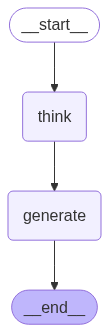

In [18]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.API)        
    )
)